In [1]:
#!pip install fredapi
#此為製造商耐久財新訂單與聯邦基金有效利率的分析程式碼

In [2]:
from fredapi import Fred

In [3]:
fred = Fred(api_key='a647122989b20aaac3b3e716703300be')

In [4]:
data1 = fred.get_series('DGORDER')

In [5]:
type(data1) #series代表時間序列

pandas.core.series.Series

In [6]:
data1 = fred.get_series('DGORDER', '1/1/2010')

<Axes: >

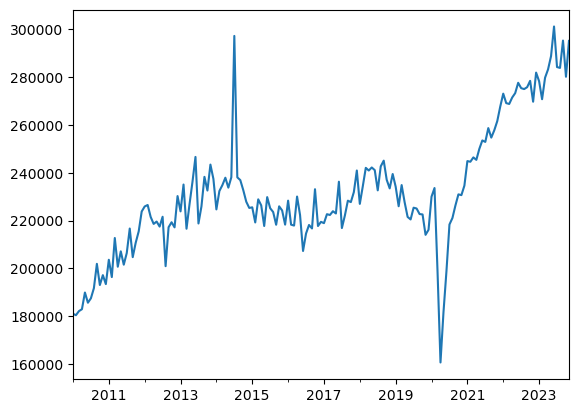

In [7]:
data1.plot()

In [8]:
data2 = fred.get_series('FEDFUNDS')

In [9]:
type(data2)

pandas.core.series.Series

In [10]:
data2 = fred.get_series('FEDFUNDS', '1/1/2010')

<Axes: >

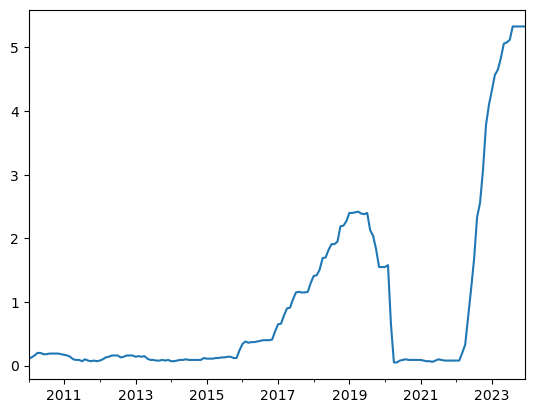

In [11]:
data2.plot()

In [12]:
df1 = data1.to_frame(name="DGORDER")
df2 = data2.to_frame(name='FEDFUNDS')

In [13]:
import pandas as pd
df_merged = pd.concat([df1, df2], axis=1)

In [14]:
df_merged

,DGORDER,FEDFUNDS
2010-01-01,181016.0,0.11
2010-02-01,180450.0,0.13
2010-03-01,182148.0,0.16
2010-04-01,182948.0,0.20
2010-05-01,189932.0,0.20
...,...,...
2023-08-01,283917.0,5.33
2023-09-01,295365.0,5.33
2023-10-01,280217.0,5.33
2023-11-01,295235.0,5.33


In [15]:
import matplotlib
import matplotlib.pyplot as plt

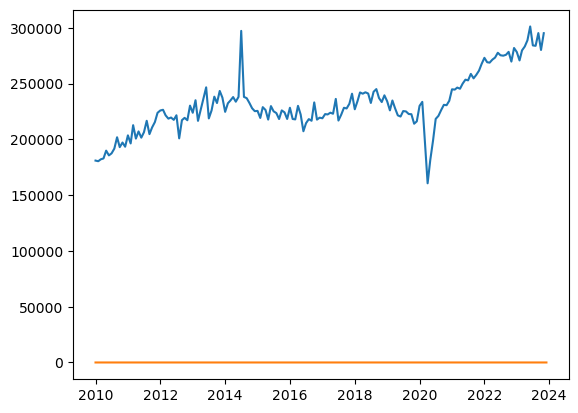

In [16]:
plt.plot(df_merged.index, df_merged['DGORDER'])
plt.plot(df_merged.index, df_merged['FEDFUNDS'])

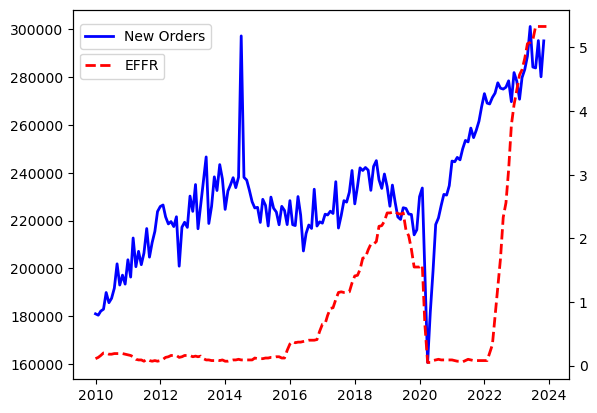

In [17]:
fig,ax = plt.subplots()
ax.plot(df_merged.index, df_merged['DGORDER'],color="blue", linewidth=2, label="New Orders")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.98))
ax2=ax.twinx()
ax2.plot(df_merged.index, df_merged['FEDFUNDS'],color="red", linewidth=2, linestyle='dashed', label="EFFR")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
fig.savefig('折線圖.jpg',format='jpeg')

In [18]:
df_merged.corr()

,DGORDER,FEDFUNDS
DGORDER,1.000000,0.603881
FEDFUNDS,0.603881,1.000000


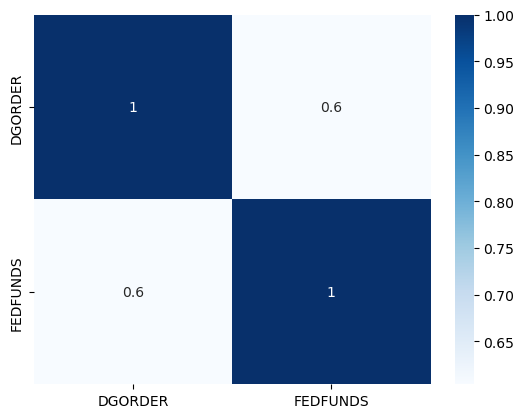

In [19]:
import seaborn as sns
svm = sns.heatmap(df_merged.corr(), cmap="Blues", annot=True)
figure = svm.get_figure()    
figure.savefig('相關係數.png', dpi=400)

<Axes: xlabel='DGORDER', ylabel='FEDFUNDS'>

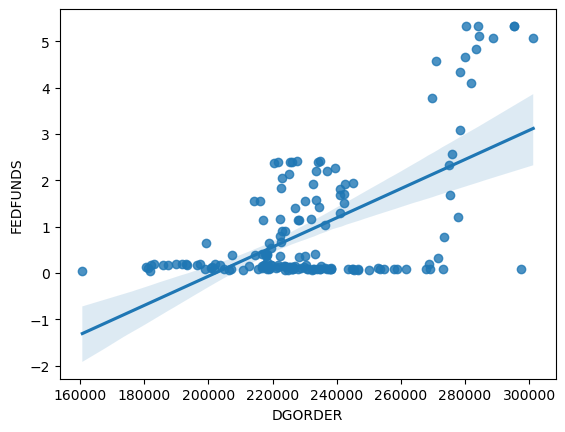

In [20]:
# use the function regplot to make a scatterplot
sns.regplot(x=df_merged['DGORDER'], y=df_merged['FEDFUNDS'])

In [21]:
df_diff1 = df_merged['DGORDER'].diff()

In [22]:
df_diff2 = df_merged['FEDFUNDS'].diff()

In [23]:
df_merged2 = pd.concat([df_diff1, df_diff2], axis=1)

In [24]:
df_merged2

,DGORDER,FEDFUNDS
2010-01-01,NaN,NaN
2010-02-01,-566.0,0.02
2010-03-01,1698.0,0.03
2010-04-01,800.0,0.04
2010-05-01,6984.0,0.00
...,...,...
2023-08-01,-365.0,0.21
2023-09-01,11448.0,0.00
2023-10-01,-15148.0,0.00
2023-11-01,15018.0,0.00


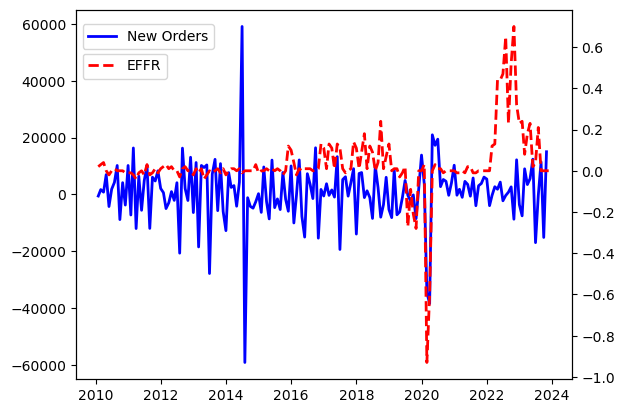

In [25]:
fig,ax = plt.subplots()
ax.plot(df_merged2.index, df_merged2['DGORDER'],color="blue", linewidth=2, label="New Orders")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.98))
ax2=ax.twinx()
ax2.plot(df_merged2.index, df_merged2['FEDFUNDS'],color="red", linewidth=2, linestyle='dashed', label="EFFR")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
fig.savefig('折線圖.jpg',format='jpeg')

In [26]:
df_merged2.corr()

,DGORDER,FEDFUNDS
DGORDER,1.000000,0.190734
FEDFUNDS,0.190734,1.000000


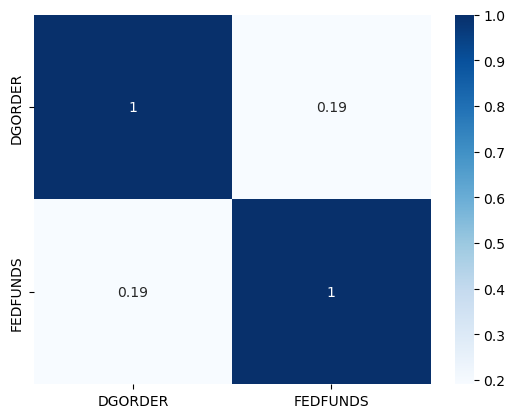

In [27]:
import seaborn as sns
svm2 = sns.heatmap(df_merged2.corr(), cmap="Blues", annot=True)
figure = svm2.get_figure()    
figure.savefig('相關係數.png', dpi=400)

In [28]:
df_pct1 = df_merged['DGORDER'].pct_change()

In [29]:
df_pct2 = df_merged['FEDFUNDS'].pct_change()

In [30]:
df_merged3 = pd.concat([df_pct1, df_pct2], axis=1)

In [31]:
df_merged3

,DGORDER,FEDFUNDS
2010-01-01,NaN,NaN
2010-02-01,-0.003127,0.181818
2010-03-01,0.009410,0.230769
2010-04-01,0.004392,0.250000
2010-05-01,0.038175,0.000000
...,...,...
2023-08-01,-0.001284,0.041016
2023-09-01,0.040322,0.000000
2023-10-01,-0.051286,0.000000
2023-11-01,0.053594,0.000000


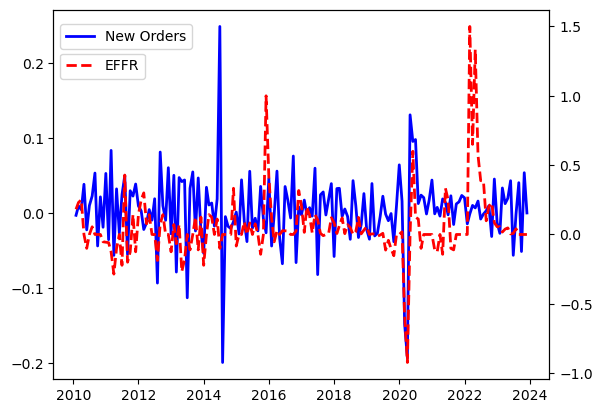

In [32]:
fig,ax = plt.subplots()
ax.plot(df_merged3.index, df_merged3['DGORDER'],color="blue", linewidth=2, label="New Orders")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.98))
ax2=ax.twinx()
ax2.plot(df_merged3.index, df_merged3['FEDFUNDS'],color="red", linewidth=2, linestyle='dashed', label="EFFR")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
fig.savefig('折線圖.jpg',format='jpeg')

In [33]:
df_merged3.corr()

,DGORDER,FEDFUNDS
DGORDER,1.000000,0.171478
FEDFUNDS,0.171478,1.000000


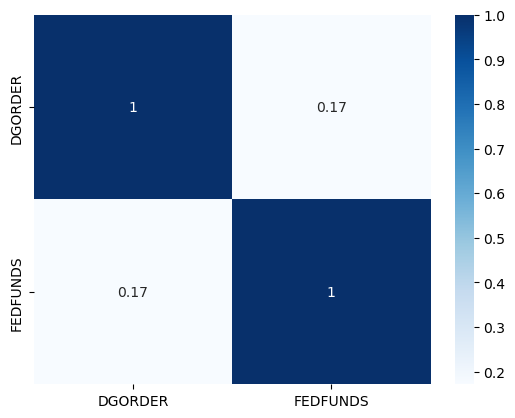

In [34]:
import seaborn as sns
svm3 = sns.heatmap(df_merged3.corr(), cmap="Blues", annot=True)
figure = svm3.get_figure()    
figure.savefig('相關係數.png', dpi=400)